In [18]:
#2번 연습문제 비만 분류
import pandas as pd
import numpy as np
import tensorflow as tf
path='C:/Users/김경한/jupyter notebook data/dataset/pima-indians-diabetes.csv'
data=pd.read_csv(path,header=None)
data.head(3) #마지막 열이 당뇨여부 0:당뇨x, 1:당뇨o
#o번: 임신 1번:혈압 ... 6번:가족력, 7번:니이

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
1.mnist 90%이상 높히기
2.당뇨병예측

In [34]:
xtrain=data.iloc[:,0:8]
ytrain=data.iloc[:,[8]] #<- 8번째에 차원([])을 하나 주어야 ,1이 됨
print(xtrain.head(3),"\n",ytrain.head(3))
print(xtrain.shape,ytrain.shape)

   0    1   2   3  4     5      6   7
0  6  148  72  35  0  33.6  0.627  50
1  1   85  66  29  0  26.6  0.351  31
2  8  183  64   0  0  23.3  0.672  32 
    8
0  1
1  0
2  1
(768, 8) (768, 1)


In [13]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(xtrain)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
# scaled 된 데이터로 xtrain을 바꿈
xScaled=scale.transform(xtrain)
xtrain=xScaled  

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xtrain,ytrain,test_size=0.3,random_state=22)

In [20]:
x=tf.placeholder(tf.float32,shape=[None,8]) #<- 700여개의 데이터가 8개의 feature로 들어갈 예정
y=tf.placeholder(tf.float32,shape=[None,1]) # 0 or 1 한자리로 나옴

In [22]:
#layer 1층
w1=tf.Variable(tf.random_normal([8,8]))   #<- 8개의 feature와 matrix곱
b1=tf.Variable(tf.random_normal([8]))  # output = 8 
layer1=tf.sigmoid(tf.matmul(x,w1)+b1)

In [24]:
#layer 2층
w2=tf.Variable(tf.random_normal([8,8]))   #<- 8개의 feature와 matrix곱
b2=tf.Variable(tf.random_normal([8]))  # output = 8 
layer2=tf.sigmoid(tf.matmul(layer1,w2)+b2)

In [26]:
#layer 3층
w3=tf.Variable(tf.random_normal([8,8]))   #<- 8개의 feature와 matrix곱
b3=tf.Variable(tf.random_normal([8]))  # output = 8 
hf=tf.sigmoid(tf.matmul(layer2,w3)+b3) #hypothesis function

In [28]:
#cost, predict 등 정의
cost = -tf.reduce_mean(y*tf.log(hf) + (1-y)*tf.log(1-hf))
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost) #<- cost를 최소화하는 train node정의
predict = tf.cast(hf>0.5,dtype=tf.float32)
# tf.cast에서 dtype을 정의해줌
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict,y),dtype=tf.float32))

In [39]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #<- 변수들을 사용하기 위한 초기화
    for step in range(10001):
        #x,y에 train데이터들을 입력하고 cost,train 노드를 실행하여 cv만 받아냄
        cv,_ = sess.run([cost,train],feed_dict={x:xtrain,y:ytrain})
        
        if step%500==0:
            print(step,cv) #500번째마다 step과 cost value받기
    # xtest,ytest를 입력하여 hf,predict,accuracy 노드 실행하기        
    _,pv,ac=sess.run([hf,predict,accuracy],feed_dict={x:xtest,y:ytest})
    print("accuracy:",ac)
        
        

0 0.9345312
500 0.7452611
1000 0.6804075
1500 0.6575538
2000 0.6496335
2500 0.64537984
3000 0.6432742
3500 0.6420525
4000 0.64101666
4500 0.6400492
5000 0.63910776
5500 0.63817674
6000 0.6372495
6500 0.63632214
7000 0.6353918
7500 0.6344578
8000 0.6335177
8500 0.6325721
9000 0.63162357
9500 0.6304226
10000 0.62945
accuracy: 0.64880955


In [41]:
#1번 mnist 해보기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
tf.set_random_seed(777)
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [44]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001F689B0E788>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001F6822E4908>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001F689B56C48>)

In [45]:
x = tf.placeholder(tf.float32,[None,784]) #784모양의 데이터들이 들어올 x변수
y = tf.placeholder(tf.float32,[None,10]) #숫자가 0~9까지 10개

In [48]:
#layer1
w1 = tf.Variable(tf.random_normal([784,256])) #<-input:784 output:256 
b1 = tf.Variable(tf.random_normal([256]))
layer1 = tf.sigmoid(tf.matmul(x,w1)+b1)

In [50]:
#최종 출력층
w2 = tf.Variable(tf.random_normal([256,10])) #10개의 숫자 모양 추측
b2 = tf.Variable(tf.random_normal([10]))
hf = tf.nn.softmax(tf.matmul(layer1,w2)+b2)

In [51]:
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(hf),axis=1))
isCorrect = tf.equal(tf.argmax(hf,1),tf.argmax(y,1))

In [52]:
accuracy = tf.reduce_mean(tf.cast(isCorrect,tf.float32))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [53]:
mnist.train.num_examples # 55000개 데이터

55000

In [56]:
numEpochs=100
batch_size=100
numIter=int(mnist.train.num_examples/batch_size) # 학습데이터를 batchsize로 나눔

epoch:0001,cost:2.051597589
epoch:0002,cost:0.872361514
epoch:0003,cost:0.686024267
epoch:0004,cost:0.588341763
epoch:0005,cost:0.515166325
epoch:0006,cost:0.467164548
epoch:0007,cost:0.435296056
epoch:0008,cost:0.400676202
epoch:0009,cost:0.376421490
epoch:0010,cost:0.352056451
epoch:0011,cost:0.333287808
epoch:0012,cost:0.315263352
epoch:0013,cost:0.302317784
epoch:0014,cost:0.289852315
epoch:0015,cost:0.278716436
epoch:0016,cost:0.262397636
epoch:0017,cost:0.260806063
epoch:0018,cost:0.244654720
epoch:0019,cost:0.239847751
epoch:0020,cost:0.234408677
epoch:0021,cost:0.223833770
epoch:0022,cost:0.219960424
epoch:0023,cost:0.215274359
epoch:0024,cost:0.204976120
epoch:0025,cost:0.202890743
epoch:0026,cost:0.197904956
epoch:0027,cost:0.189895085
epoch:0028,cost:0.190635263
epoch:0029,cost:0.183879117
epoch:0030,cost:0.177942495
epoch:0031,cost:0.175990232
epoch:0032,cost:0.171696118
epoch:0033,cost:0.170164961
epoch:0034,cost:0.166502252
epoch:0035,cost:0.159621552
epoch:0036,cost:0.15

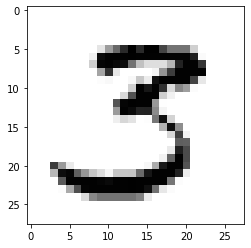

In [58]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(numEpochs): #<-epoch마다
        avgCv=0 #<-cost value를 더할 변수를 만들어줌
        for i in range(numIter):
            batchx,batchy = mnist.train.next_batch(batch_size)
            _,cv=sess.run([train,cost],feed_dict={x:batchx,y:batchy})
            avgCv += cv/numIter #<- cost / numIter를 계속 더하기, 평균cost value구하기
        print("epoch:{:04d},cost:{:.9f}".format(epoch+1,avgCv))
    print("accuracy:",accuracy.eval(session=sess,
                                    feed_dict={x:mnist.test.images,
                                                           y:mnist.test.labels}))
    rand=random.randint(0,mnist.test.num_examples-1)
    #rand번째 숫자의 번호
    print("label:",sess.run(tf.argmax(mnist.test.labels[rand:rand+1],1)))
    #x에 image데이터만 입력해주고 예측함
    print("predict:",sess.run(tf.argmax(hf,1),
                              feed_dict={x:mnist.test.images[rand:rand+1]}))
    #mnist.image의 rand번째 이미지를 28*28로 reshape해서 imshow함
    plt.imshow(mnist.test.images[rand:rand+1].reshape(28,28),cmap="Greys")
    plt.show